# Student Data Analysis

This is student data from Student 32 from TripleTen’s Data Science or Software Engineering programs. In the dataset are timestamped events for one student, with indications about the time of day, day of the week, and (rough) location they are in the program. The goal of this analysis is to study the student's activity and determine if he/she had a difference in activity/ events between weekdays and weekends. 

#### Data: 
- `student`— unique id for each student
- event_type:
    - `event_1` — lesson open
    - `event_2` — task attempt
    - `event_3` — task correct
- `dt` — the date of the event
- `tm` — the time of the event (UTC)
- `tod_bin` — the time of day
- `dow' — the day of the week
- width_bucket — an integer representing what period of the program the student has completed. Values are:
    - `1` - the first third of the program
    - `2` - the middle third of the program
    - `3`- the final third of the program

### Data Preprocessing & EDA

In [1]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import  numpy as np
import seaborn as sns
from scipy import stats as st

#setting plot style for all graphs
plt.style.use('ggplot')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading in the dataset 
student = pd.read_csv('Student_32_10658.csv')
student.head()

,student,event_type,dt,tm,tod_bin,dow,width_bucket
0,32,event_2,2022-08-21,00:24:54,evening,Sunday,1
1,32,event_2,2022-09-01,02:11:09,evening,Thursday,1
2,32,event_3,2022-09-01,02:00:47,evening,Thursday,1
3,32,event_2,2022-09-01,02:07:38,evening,Thursday,1
4,32,event_3,2022-09-01,02:06:16,evening,Thursday,1


In [3]:
#looking at dataset info
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   student       10658 non-null  int64 
 1   event_type    10658 non-null  object
 2   dt            10658 non-null  object
 3   tm            10658 non-null  object
 4   tod_bin       10658 non-null  object
 5   dow           10658 non-null  object
 6   width_bucket  10658 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 583.0+ KB


The date and time of event columns are objects. We Will change these to the proper data types.

In [4]:
# Concatenate 'dt' and 'tm' columns and convert to datetime
student['combined_datetime'] = pd.to_datetime(student['dt'] + ' ' + student['tm'])

In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   student            10658 non-null  int64         
 1   event_type         10658 non-null  object        
 2   dt                 10658 non-null  object        
 3   tm                 10658 non-null  object        
 4   tod_bin            10658 non-null  object        
 5   dow                10658 non-null  object        
 6   width_bucket       10658 non-null  int64         
 7   combined_datetime  10658 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 666.2+ KB


In [7]:
student.head()

,student,event_type,dt,tm,tod_bin,dow,width_bucket,combined_datetime
0,32,event_2,2022-08-21,00:24:54,evening,Sunday,1,2022-08-21 00:24:54
1,32,event_2,2022-09-01,02:11:09,evening,Thursday,1,2022-09-01 02:11:09
2,32,event_3,2022-09-01,02:00:47,evening,Thursday,1,2022-09-01 02:00:47
3,32,event_2,2022-09-01,02:07:38,evening,Thursday,1,2022-09-01 02:07:38
4,32,event_3,2022-09-01,02:06:16,evening,Thursday,1,2022-09-01 02:06:16


In [8]:
#looking for missing values
student.isnull().sum()

student              0
event_type           0
dt                   0
tm                   0
tod_bin              0
dow                  0
width_bucket         0
combined_datetime    0
dtype: int64

In [9]:
#looking at duplicates
student.duplicated().sum()

221

In [10]:
#looking at duplicated rows
student[student.duplicated()]

,student,event_type,dt,tm,tod_bin,dow,width_bucket,combined_datetime
2063,32,event_1,2022-10-19,16:43:08,afternoon,Wednesday,1,2022-10-19 16:43:08
2107,32,event_1,2022-10-19,16:24:05,afternoon,Wednesday,1,2022-10-19 16:24:05
2207,32,event_1,2022-10-18,15:09:00,afternoon,Tuesday,1,2022-10-18 15:09:00
2220,32,event_1,2022-10-30,19:59:53,evening,Sunday,1,2022-10-30 19:59:53
2266,32,event_1,2022-10-29,04:08:17,morning,Saturday,1,2022-10-29 04:08:17
...,...,...,...,...,...,...,...,...
10360,32,event_1,2023-03-29,21:16:21,evening,Wednesday,2,2023-03-29 21:16:21
10457,32,event_1,2023-03-26,04:31:53,morning,Sunday,2,2023-03-26 04:31:53
10512,32,event_1,2023-03-26,07:36:48,morning,Sunday,2,2023-03-26 07:36:48
10519,32,event_1,2023-03-26,07:42:12,morning,Sunday,2,2023-03-26 07:42:12


In [11]:
#dropping duplicate rows 
student = student.drop_duplicates()

In [12]:
#looking to make sure duplicate rows are dropped 
student.shape

(10437, 8)

There are 221 duplicated rows for the event type, we have dropped the duplicates. We have also changed necessary data types and looked for null values of which there were none. 

In [13]:
#looking at student unique values
student['student'].unique()

array([32], dtype=int64)

In [14]:
#looking at event_type unique values
student['event_type'].unique()

array(['event_2', 'event_3', 'event_1'], dtype=object)

In [15]:
#looking at number of date occurances
student['dt'].value_counts()

2022-10-29    234
2023-05-26    206
2023-01-26    195
2022-12-21    189
2022-10-28    187
             ... 
2022-09-07      1
2022-12-11      1
2022-11-05      1
2023-01-31      1
2023-05-31      1
Name: dt, Length: 266, dtype: int64

In [16]:
#looking at time occurances
student['tm'].value_counts()

02:33:16    5
02:24:33    4
03:14:51    4
05:49:36    3
00:44:51    3
           ..
06:28:20    1
05:59:58    1
05:58:42    1
02:55:21    1
06:48:35    1
Name: tm, Length: 9538, dtype: int64

In [17]:
#looking at time of day unique values
student['tod_bin'].unique()

array(['evening', 'afternoon', 'morning'], dtype=object)

In [18]:
#looking at day of week unique values
student['dow'].unique()

array(['Sunday   ', 'Thursday ', 'Saturday ', 'Wednesday', 'Tuesday  ',
       'Friday   ', 'Monday   '], dtype=object)

In [19]:
#looking at event stages 
student['width_bucket'].unique()

array([1, 2, 3], dtype=int64)

In [20]:
#looking at earliest date
student['dt'].min()

'2022-08-03'

In [21]:
#looking at latest date
student['dt'].max()

'2023-07-27'

The earliest log in date is 8/3/2022 and latest log in date is 7/27/23. 

In [22]:
student.describe(include='all')

,student,event_type,dt,tm,tod_bin,dow,width_bucket,combined_datetime
count,10437.0,10437,10437,10437,10437,10437,10437.000000,10437
unique,NaN,3,266,9538,3,7,NaN,10433
top,NaN,event_1,2022-10-29,02:33:16,evening,Friday,NaN,2022-10-09 18:08:21
freq,NaN,8603,234,5,6494,2071,NaN,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-03 21:15:14
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-27 04:23:33
mean,32.0,NaN,NaN,NaN,NaN,NaN,2.016767,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,0.736971,NaN
min,32.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,32.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


Event_1, evening time, and Fridays occur the most. The average amount of times the user logged on was during the middle third of the program. 

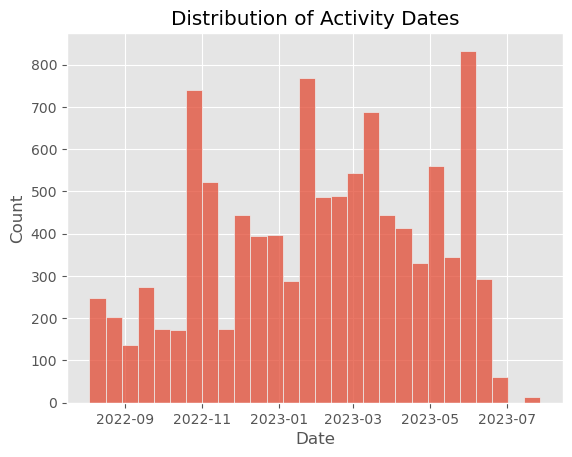

In [23]:
sns.histplot(data=student, x="combined_datetime")
plt.title('Distribution of Activity Dates')
plt.xlabel('Date');

The highest occurance of logins seem to occur during end of January to March. 

In [24]:
student['hour'] = student['combined_datetime'].dt.hour

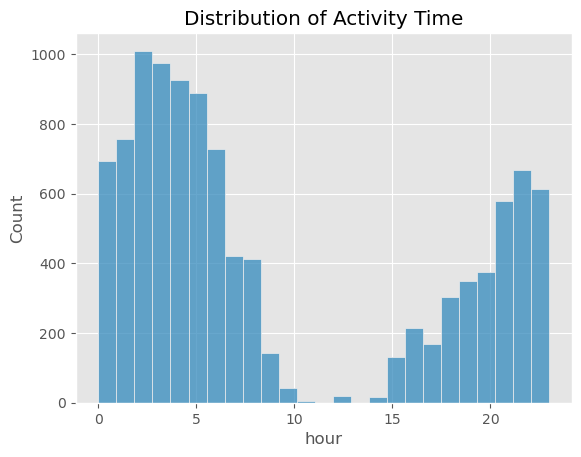

In [25]:
sns.histplot(data=student, x="hour", bins = 25)
plt.title('Distribution of Activity Time');

The times of activity that occurs the most are during the early hours of the morning between 3-5am. 

In [26]:
#looking at relationship between time of day and event
events = student['event_type'].value_counts().sort_values(ascending=False).reset_index()
events.columns = ['event_type', 'total_occurrance']
events

,event_type,total_occurrance
0,event_1,8603
1,event_3,987
2,event_2,847


In [27]:
#looking at relationship between time of day and event, breaking it down even further
tod_event = student.pivot_table(values='student', index='event_type', columns='tod_bin', aggfunc='count').reset_index()
tod_event.columns = ['event_type', 'afternoon', 'evening', 'morning']
tod_event

,event_type,afternoon,evening,morning
0,event_1,265,5142,3196
1,event_2,54,622,171
2,event_3,59,730,198


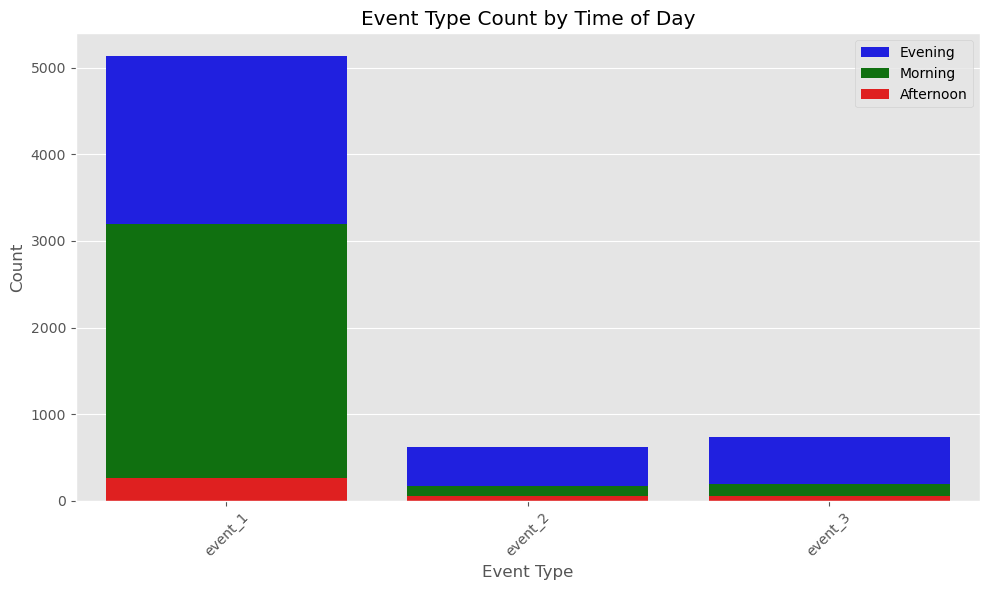

In [28]:
#graphing relationship between time of day and event
plt.figure(figsize=(10, 6))
sns.barplot(x='event_type', y='evening', data=tod_event, color='blue', label='Evening')
sns.barplot(x='event_type', y='morning', data=tod_event, color='green', label='Morning')
sns.barplot(x='event_type', y='afternoon', data=tod_event, color='red', label='Afternoon')

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Event Type Count by Time of Day')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show();

The number of lessons opened occurs the most followed by completed tasks. Event_1 also leads by a huge margin.

In [29]:
#Seeing how many logins associated with completion of which part of the program. sorting them by frequency 
period_program_completed = student['width_bucket'].value_counts().sort_values(ascending=False).reset_index()
period_program_completed.columns = ['period_program_completed', 'total_occurrance']
period_program_completed

,period_program_completed,total_occurrance
0,2,4766
1,3,2923
2,1,2748


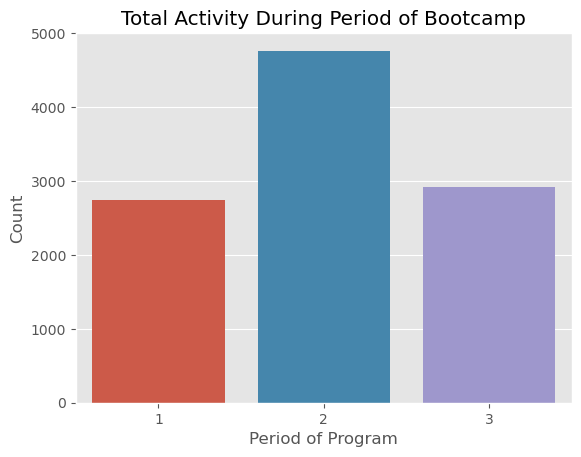

In [30]:
#plotting the logins during bootcamp period 
sns.barplot(data=period_program_completed, x='period_program_completed', y='total_occurrance')
plt.title('Total Activity During Period of Bootcamp')
plt.xlabel('Period of Program')
plt.ylabel('Count');

The majority of the logins occur during the middle third of the program. 

In [31]:
#looking at relationship between day of week and event_type
dow_event = student.pivot_table(values='student', index='event_type', columns='dow', aggfunc='count'). reset_index()
dow_event.columns = ['event_type','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
dow_event

,event_type,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,event_1,1758,806,1180,1410,1059,910,1480
1,event_2,107,44,150,108,196,110,132
2,event_3,206,82,110,126,202,103,158


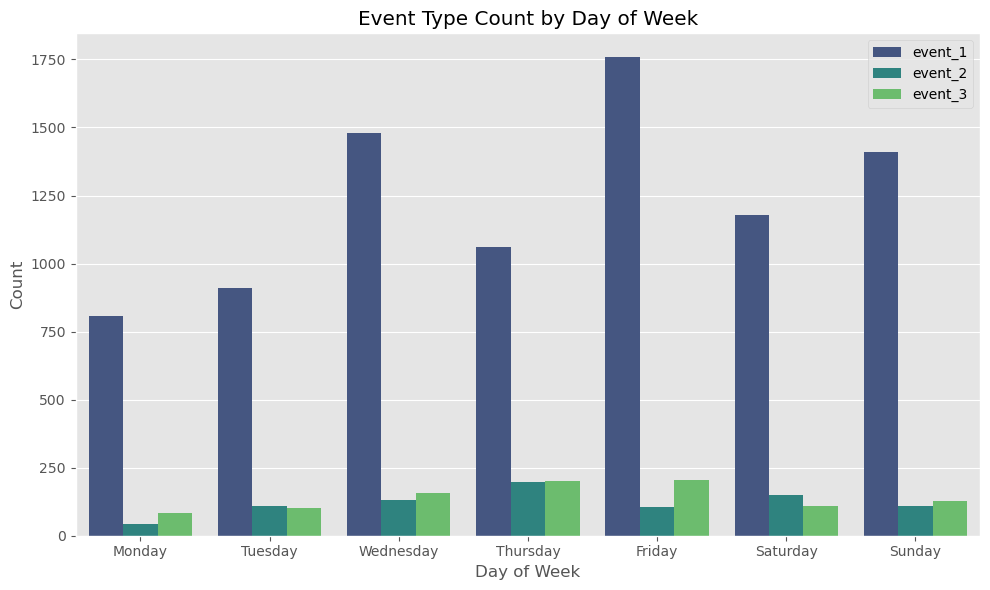

In [32]:
#plotting relationship between day of week and event_type
# Reorder the columns
column_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_event = dow_event.reindex(columns=['event_type'] + column_order)

# Melt the DataFrame for Seaborn plotting
dow_event_melted = pd.melt(dow_event, id_vars='event_type', var_name='Day of Week', value_name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='Count', hue='event_type', data=dow_event_melted, palette='viridis')

# Adding labels and title
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Event Type Count by Day of Week')

plt.legend()
plt.tight_layout()
plt.show()

It seems that Wednesdays and Fridays are the most active days for the student. 

In [33]:
#adding column for month
student['dt_month'] = student['combined_datetime'].dt.month

In [34]:
student.head()

,student,event_type,dt,tm,tod_bin,dow,width_bucket,combined_datetime,hour,dt_month
0,32,event_2,2022-08-21,00:24:54,evening,Sunday,1,2022-08-21 00:24:54,0,8
1,32,event_2,2022-09-01,02:11:09,evening,Thursday,1,2022-09-01 02:11:09,2,9
2,32,event_3,2022-09-01,02:00:47,evening,Thursday,1,2022-09-01 02:00:47,2,9
3,32,event_2,2022-09-01,02:07:38,evening,Thursday,1,2022-09-01 02:07:38,2,9
4,32,event_3,2022-09-01,02:06:16,evening,Thursday,1,2022-09-01 02:06:16,2,9


In [35]:
# Define the custom month order to show from beginning of cohort to end
month_order = [8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7]

# Convert dt_month to pd.Categorical with custom order
student['dt_month'] = pd.Categorical(student['dt_month'], categories=month_order, ordered=True)

# Group and aggregate
monthly_sessions = student.groupby('dt_month').agg({'student': 'count'}).reset_index()
monthly_sessions.columns = ['month', 'count']
monthly_sessions

,month,count
0,8,505
1,9,522
2,10,919
3,11,802
4,12,1058
5,1,1139
6,2,1141
7,3,1438
8,4,1003
9,5,1223


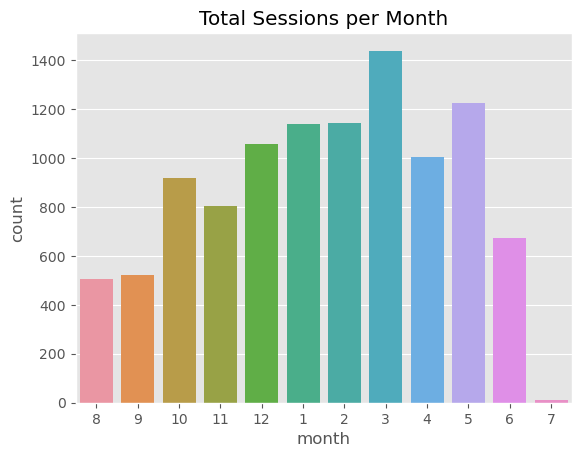

In [36]:
sns.barplot(data=monthly_sessions, x='month', y='count')
plt.title('Total Sessions per Month');

We can also confirm here that March has the most activity from the student. July had the least amount of activity regarding lessons, which makes sense as this month usually has to do with the final project. 

In [37]:
#taking a closer look, making a pivot table to look at event types completed during each month 
monthly_event = student.pivot_table(index='dt_month', values='student', columns='event_type', aggfunc='count').reset_index()
monthly_event.columns = ['month', 'event_1', 'event_2', 'event_3']
monthly_event

,month,event_1,event_2,event_3
0,8,222,90,193
1,9,255,74,193
2,10,678,130,111
3,11,572,102,128
4,12,913,72,73
5,1,918,129,92
6,2,897,140,104
7,3,1264,101,73
8,4,978,8,17
9,5,1219,1,3


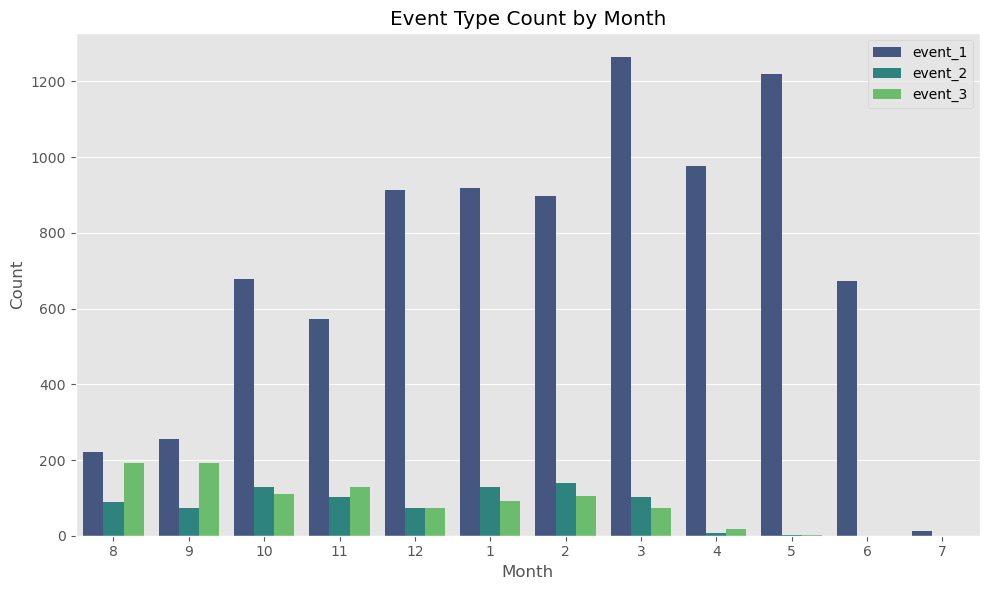

In [38]:
#plotting the monthly event
# Melt the DataFrame for Seaborn plotting
monthly_event_melted = pd.melt(monthly_event, id_vars='month', var_name='Event Type', value_name='Count')

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='Count', hue='Event Type', data=monthly_event_melted, palette='viridis')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Event Type Count by Month')

plt.legend()
plt.tight_layout()
plt.show()

If we look at the event type trends over time, we can see that the number of lessons opened occured the most in the middle of the cohort. The student seemed to be pretty consistent with activity each month. 

### Hypothesis Testing

Null: The average hour of the date of event/activty does not differ between weekdays and weekends.</br>
Alternative: The average hour of the date of event/activty is different between weekdays and weekends.

In [39]:
#defining the two groups to test
weekdays = student[student['dow'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['hour']
weekends = student[student['dow'].isin(['Saturday', 'Sunday'])]['hour']

In [40]:
# Test the hypotheses, creating a function to also test if variance is equal between the two populations
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=st.levene(sample1, sample2).pvalue.astype(int)
    
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
        
    p_value=st.ttest_ind(sample1, sample2, nan_policy='omit', equal_var=option_var).pvalue
    if p_value<alpha:
        print('We reject the null hypothesis: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to reject null hypothesis: We don't have enough evidence to say that averages of sample 1 \
        and sample 2 are not the same") 

In [41]:
#looking at the p-value alone
t_test(weekdays, weekends, alpha=0.05)

Fail to reject null hypothesis: We don't have enough evidence to say that averages of sample 1         and sample 2 are not the same


## Conclusion:

The earliest log in date is 8/3/2022 and latest log in date is 7/27/23. The most popular study times for the student is early morning between 3-5am and the middle of the day hardly gets any activity. The most occuring event is opening lessons followed by completion of lessons. The most activity is also during the middle third of the program. Friday seems to be the day with the most events. The student is consistent with logging in and opening lessons to completing lessons overall everyday and throughout the cohort. When looking at months, activity started picking up in the middle of the cohort and towards the end. After testing the hypothesis that the average hour of the date of event/activty is different between weekdays and weekends, we found no statistical difference. 

